In [1662]:
import datetime
import pandas as pd
import requests
import matplotlib as mpl
import matplotlib.pyplot as plt
from prophet import Prophet

mpl.rcParams['figure.figsize'] = (10, 8)
mpl.rcParams['axes.grid'] = False

# Load Data

In [1663]:
data = pd.read_csv('Daily_basis_for.csv',index_col=0)
data['Date'] = pd.to_datetime(data['Date'])
data = data[data['Product'] != 'Claims']
data = data.set_index('Date')
data = data[['Product','no_of_tickets']]
data = data.groupby('Product').resample('M').sum()

In [1664]:
data = data.reset_index()

In [1665]:
data = data.set_index('Date')

In [1666]:
data.shape

(947, 2)

# Statical Test Kpsss and Augmanted Dickyfuller test

# Kpss test

In [1667]:
## kpss test
def kpss_test(data,stationary_with_trend_or_constant):
    from statsmodels.tsa.stattools import kpss
    stats, p , lags ,critical_values = kpss(data,stationary_with_trend_or_constant)
    print(f'Test Statistics: {stats}')
    print(f'p-value: {p}')
    print(f'Critial Values: {critical_values}')

    if p < 0.05 :
        print('Series is not Stationary')
    else:
        print('Series is Stationary')

# Augmanted Dickyfuller Test

In [1668]:
from statsmodels.tsa.stattools import adfuller
def adf_test(data):
    
    result = adfuller(data)
#     print(f'Test Statistics: {result[0]}')
    print(f'p-value: {result[1]}')
#     print(f'Critial Values: {result[4]}')

    if result[1] > 0.05 :
        print( 'Non-Stationary ')
    else:
        print( 'Stationary')
    return result[1]
    

In [1669]:
Product_category = data['Product'].unique()

count = 0

data_frames_dict = {}
for i in Product_category:
    count +=1
    data_name = 'df_' + str(i)
    
    data_frames_dict[data_name] = data.query(f"Product == '{i}'")

In [1670]:
df_compliance  = data_frames_dict['df_Compliance']
df_office_Excel  = data_frames_dict['df_Office - Excel Add-In']
df_Provision  = data_frames_dict['df_Provision']
df_Websites  = data_frames_dict['df_Websites']
df_Application_hosting  = data_frames_dict['df_Application Hosting']
#df_Claims  = data_frames_dict['df_Claims']
df_Data_exchange_manager  = data_frames_dict['df_Data Exchange Manager']
df_international  = data_frames_dict['df_International (US)']
df_odbc_driver  = data_frames_dict['df_ODBC Driver - Corptax']
df_sales = data_frames_dict['df_Sales Tax']
df_clandar = data_frames_dict['df_Calendar']
df_partnership = data_frames_dict['df_Partnership / S Corp / Pass-Through']
df_workspace = data_frames_dict['df_WorkSpace']
df_other = data_frames_dict['df_Other']
df_web_services = data_frames_dict['df_Web Services']

In [1671]:
for key,value in data_frames_dict.items():
    df = data_frames_dict[key]
    print(df.shape,key)

(68, 2) df_Application Hosting
(67, 2) df_Calendar
(68, 2) df_Compliance
(68, 2) df_Data Exchange Manager
(68, 2) df_International (US)
(68, 2) df_ODBC Driver - Corptax
(68, 2) df_Office - Excel Add-In
(68, 2) df_Other
(68, 2) df_Partnership / S Corp / Pass-Through
(68, 2) df_Provision
(68, 2) df_Sales Tax
(64, 2) df_Web Services
(68, 2) df_Websites
(68, 2) df_WorkSpace


In [1672]:
data_frames_dict.keys()

dict_keys(['df_Application Hosting', 'df_Calendar', 'df_Compliance', 'df_Data Exchange Manager', 'df_International (US)', 'df_ODBC Driver - Corptax', 'df_Office - Excel Add-In', 'df_Other', 'df_Partnership / S Corp / Pass-Through', 'df_Provision', 'df_Sales Tax', 'df_Web Services', 'df_Websites', 'df_WorkSpace'])

In [1673]:
kpss_test(data_frames_dict['df_Application Hosting']['no_of_tickets'],'c')

Test Statistics: 0.10425879394851328
p-value: 0.1
Critial Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is Stationary


/Users/shaelander.chauhan/opt/anaconda3/envs/env_ml/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


In [1674]:
for key,value in data_frames_dict.items():
    print(key)
    print('======='*10)
    adf_test(data_frames_dict[key]['no_of_tickets'])
    print('======='*10)

#adf_test(data_frames_dict['df_Application Hosting']['no_of_tickets'])

df_Application Hosting
p-value: 2.5649586506986332e-11
Stationary
df_Calendar
p-value: 0.9026462383966604
Non-Stationary 
df_Compliance
p-value: 0.994562795034983
Non-Stationary 
df_Data Exchange Manager
p-value: 0.18253825593020206
Non-Stationary 
df_International (US)
p-value: 0.7570813236425544
Non-Stationary 
df_ODBC Driver - Corptax
p-value: 1.939847519566728e-09
Stationary
df_Office - Excel Add-In
p-value: 0.0005105248689560432
Stationary
df_Other
p-value: 1.0
Non-Stationary 
df_Partnership / S Corp / Pass-Through
p-value: 0.6424275909533762
Non-Stationary 
df_Provision
p-value: 0.9040427510288609
Non-Stationary 
df_Sales Tax
p-value: 0.6795591678722754
Non-Stationary 
df_Web Services
p-value: 0.5772222556232882
Non-Stationary 
df_Websites
p-value: 0.0020203833905575687
Stationary
df_WorkSpace
p-value: 0.47339841128084653
Non-Stationary 


In [1675]:
df_clandar.shape

(67, 2)

# Start Here

In [1780]:
adf_test(df_compliance['no_of_tickets'])

p-value: 0.994562795034983
Non-Stationary 


0.994562795034983

In [1781]:
prediction_data = df_compliance.reset_index()

In [1782]:
prediction_data.rename(columns={'Date':'ds','no_of_tickets':'y'},inplace=True)

In [1783]:
#prediction_data['y'] = prediction_data['y'].diff(1)

In [1784]:
prediction_data = prediction_data.dropna()

<AxesSubplot:>

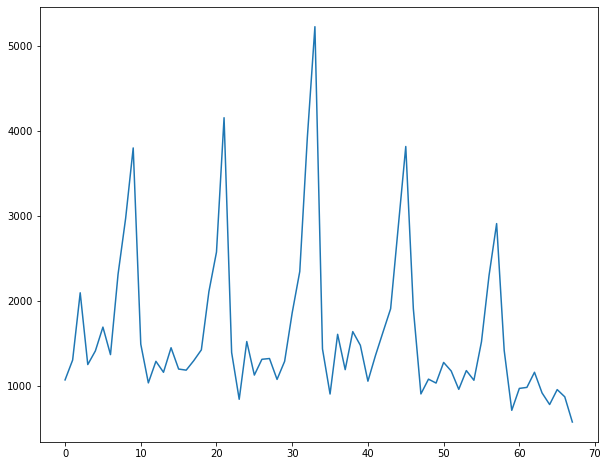

In [1785]:
prediction_data['y'].plot()

In [1787]:
print(adf_test(prediction_data['y']))
# print('='*100)
print(kpss_test(prediction_data['y'],'c'))

p-value: 0.994562795034983
Non-Stationary 
0.994562795034983
Test Statistics: 0.21955145318310065
p-value: 0.1
Critial Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is Stationary
None


/Users/shaelander.chauhan/opt/anaconda3/envs/env_ml/lib/python3.7/site-packages/statsmodels/tsa/stattools.py:2023: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is greater than the p-value returned.

  warn_msg.format(direction="greater"), InterpolationWarning


<AxesSubplot:>

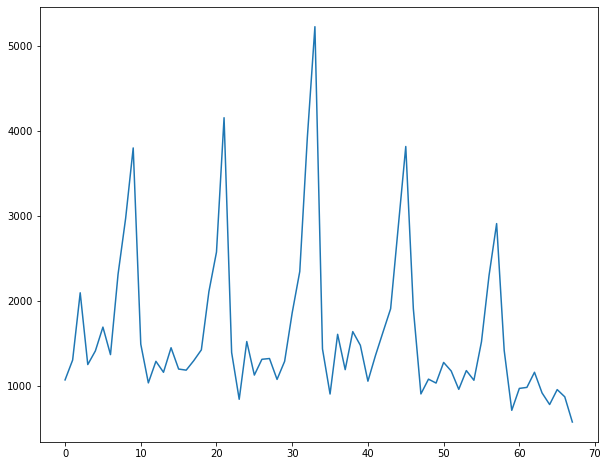

In [1767]:
prediction_data['y'].plot()

In [1768]:
prediction_data.head(3)

,ds,Product,y
0,2017-01-31,Compliance,1066
1,2017-02-28,Compliance,1300
2,2017-03-31,Compliance,2092


In [1769]:
train = prediction_data[(prediction_data['ds']>= '2017-01-31')  & (prediction_data['ds']<= '2022-01-31')]
test   = prediction_data[prediction_data['ds'] > '2022-01-31']

In [1770]:
test

,ds,Product,y
61,2022-02-28,Compliance,978
62,2022-03-31,Compliance,1156
63,2022-04-30,Compliance,913
64,2022-05-31,Compliance,776
65,2022-06-30,Compliance,952
66,2022-07-31,Compliance,867
67,2022-08-31,Compliance,570


In [1771]:
print(train.shape,test.shape)

(61, 3) (7, 3)


In [1772]:
model = Prophet(interval_width=0.95,seasonality_mode='multiplicative')#multiplicative #additive seasonality_mode='additive'

In [1773]:
model.fit(train)

21:25:54 - cmdstanpy - INFO - Chain [1] start processing
21:25:55 - cmdstanpy - INFO - Chain [1] done processing


In [1774]:
future = model.make_future_dataframe(periods=12,freq='M')

In [1775]:
future.tail()

,ds
68,2022-09-30
69,2022-10-31
70,2022-11-30
71,2022-12-31
72,2023-01-31


In [1776]:
forecast = model.predict(future)

In [1777]:
forecast[['ds','yhat','yhat_lower','yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2017-01-31,1155.022845,857.367428,1434.207553
1,2017-02-28,1162.812608,858.566968,1482.982512
2,2017-03-31,1621.498131,1321.065961,1915.704700
3,2017-04-30,1308.653144,1013.917700,1591.677696
4,2017-05-31,1158.898785,854.947345,1455.033209
...,...,...,...,...
68,2022-09-30,1800.046377,1472.676264,2102.731147
69,2022-10-31,2430.333445,2077.057847,2806.601005
70,2022-11-30,805.957720,481.397448,1104.995781
71,2022-12-31,473.597884,171.641597,770.759470


In [1778]:
pd.concat([prediction_data.set_index('ds')['y'],forecast.set_index('ds')['yhat']],axis=1).tail(10)

,y,yhat
ds,,
2022-04-30,913.0,859.488604
2022-05-31,776.0,744.958535
2022-06-30,952.0,848.388703
2022-07-31,867.0,938.858057
2022-08-31,570.0,1259.091865
2022-09-30,NaN,1800.046377
2022-10-31,NaN,2430.333445
2022-11-30,NaN,805.957720
2022-12-31,NaN,473.597884


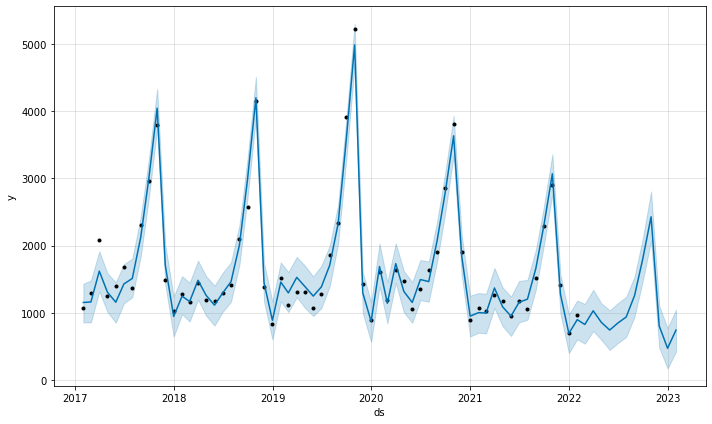

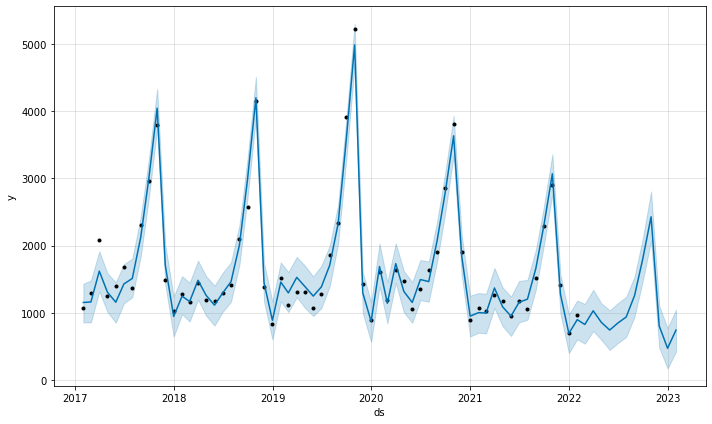

In [1779]:
model.plot(forecast)

In [1696]:
pd.concat([prediction_data.set_index('ds')['y'],forecast.set_index('ds')[['yhat','yhat_upper','yhat_lower']]],axis=1).tail(50)

,y,yhat,yhat_upper,yhat_lower
ds,,,,
2018-12-31,838.0,936.142718,1413.031415,507.165871
2019-01-31,1518.0,1532.049473,1959.259318,1092.528256
2019-02-28,1123.0,1322.913386,1732.659934,895.587815
2019-03-31,1309.0,1569.683507,2002.397041,1109.074616
2019-04-30,1318.0,1422.169410,1871.710589,982.835978
2019-05-31,1072.0,1264.281660,1704.266735,822.556634
2019-06-30,1285.0,1317.186791,1725.011441,857.019701
2019-07-31,1857.0,1558.059041,1997.245529,1116.179535
2019-08-31,2343.0,2107.679337,2561.204809,1662.976734


In [1697]:
pd.concat([prediction_data.set_index('ds')[['Product','y']],forecast.set_index('ds')[['yhat','yhat_upper','yhat_lower']]],axis=1).tail(10)

,Product,y,yhat,yhat_upper,yhat_lower
ds,,,,,
2022-04-30,Compliance,913.0,819.199442,1237.935007,384.991025
2022-05-31,Compliance,776.0,651.448965,1098.936886,204.732102
2022-06-30,Compliance,952.0,794.860933,1239.977780,329.371299
2022-07-31,Compliance,867.0,933.662873,1379.132469,470.653143
2022-08-31,Compliance,570.0,1477.588471,1906.126520,1029.556507
2022-09-30,NaN,NaN,2431.174487,2860.431658,2019.806394
2022-10-31,NaN,NaN,3607.727884,4048.035502,3148.563433
2022-11-30,NaN,NaN,749.351859,1244.450475,313.631084
2022-12-31,NaN,NaN,202.875913,648.803353,-232.656037


In [1698]:
train.shape

(61, 3)

In [1699]:
data.tail()

,Product,no_of_tickets
Date,,
2022-04-30,WorkSpace,2
2022-05-31,WorkSpace,3
2022-06-30,WorkSpace,3
2022-07-31,WorkSpace,8
2022-08-31,WorkSpace,2


In [1700]:
prediction_data

,ds,Product,y
0,2017-01-31,Compliance,1066
1,2017-02-28,Compliance,1300
2,2017-03-31,Compliance,2092
3,2017-04-30,Compliance,1247
4,2017-05-31,Compliance,1407
...,...,...,...
63,2022-04-30,Compliance,913
64,2022-05-31,Compliance,776
65,2022-06-30,Compliance,952
66,2022-07-31,Compliance,867


# Multi Time series FbProphet

In [1701]:
df_multi_timeseries = data.copy()
df_multi_timeseries = df_multi_timeseries.reset_index()

In [1702]:
df_multi_timeseries = df_multi_timeseries[['Date','Product','no_of_tickets']].rename({'Date':'ds','no_of_tickets':'y'},axis='columns')

In [1703]:
products = df_multi_timeseries.groupby('Product')

20:00:47 - cmdstanpy - INFO - Chain [1] start processing


p-value: 1.9406183244230425e-10
Stationary


20:00:47 - cmdstanpy - INFO - Chain [1] done processing
20:00:48 - cmdstanpy - INFO - Chain [1] start processing


p-value: 0.9624514469697817
Non-Stationary 


20:00:48 - cmdstanpy - INFO - Chain [1] done processing
20:00:49 - cmdstanpy - INFO - Chain [1] start processing


p-value: 0.985523599267947
Non-Stationary 


20:00:50 - cmdstanpy - INFO - Chain [1] done processing
20:00:50 - cmdstanpy - INFO - Chain [1] start processing


p-value: 0.22480620287575948
Non-Stationary 


20:00:51 - cmdstanpy - INFO - Chain [1] done processing
/Users/shaelander.chauhan/opt/anaconda3/envs/env_ml/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Passing 'suffixes' which cause duplicate columns {'yearly_upper_x', 'additive_terms_lower_x', 'yearly_lower_x', 'multiplicative_terms_lower_x', 'trend_x', 'trend_upper_x', 'trend_lower_x', 'yearly_x', 'additive_terms_upper_x', 'multiplicative_terms_upper_x', 'multiplicative_terms_x', 'additive_terms_x'} in the result is deprecated and will raise a MergeError in a future version.
20:00:51 - cmdstanpy - INFO - Chain [1] start processing


p-value: 0.6100598470168888
Non-Stationary 


20:00:52 - cmdstanpy - INFO - Chain [1] done processing
20:00:52 - cmdstanpy - INFO - Chain [1] start processing


p-value: 2.914421169819088e-09
Stationary


20:00:52 - cmdstanpy - INFO - Chain [1] done processing
/Users/shaelander.chauhan/opt/anaconda3/envs/env_ml/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Passing 'suffixes' which cause duplicate columns {'yearly_upper_x', 'additive_terms_lower_x', 'yearly_lower_x', 'multiplicative_terms_lower_x', 'trend_x', 'trend_upper_x', 'trend_lower_x', 'yearly_x', 'additive_terms_upper_x', 'multiplicative_terms_upper_x', 'multiplicative_terms_x', 'additive_terms_x'} in the result is deprecated and will raise a MergeError in a future version.
20:00:53 - cmdstanpy - INFO - Chain [1] start processing


p-value: 0.00035681676595578825
Stationary


20:00:53 - cmdstanpy - INFO - Chain [1] done processing
20:00:54 - cmdstanpy - INFO - Chain [1] start processing


p-value: 1.0
Non-Stationary 


20:00:55 - cmdstanpy - INFO - Chain [1] done processing
/Users/shaelander.chauhan/opt/anaconda3/envs/env_ml/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Passing 'suffixes' which cause duplicate columns {'yearly_upper_x', 'additive_terms_lower_x', 'yearly_lower_x', 'multiplicative_terms_lower_x', 'trend_x', 'trend_upper_x', 'trend_lower_x', 'additive_terms_upper_x', 'yearly_x', 'multiplicative_terms_upper_x', 'multiplicative_terms_x', 'additive_terms_x'} in the result is deprecated and will raise a MergeError in a future version.
20:00:55 - cmdstanpy - INFO - Chain [1] start processing


p-value: 0.7318959021852973
Non-Stationary 


20:00:56 - cmdstanpy - INFO - Chain [1] done processing
20:00:56 - cmdstanpy - INFO - Chain [1] start processing


p-value: 0.9537227555719936
Non-Stationary 


20:00:57 - cmdstanpy - INFO - Chain [1] done processing
/Users/shaelander.chauhan/opt/anaconda3/envs/env_ml/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Passing 'suffixes' which cause duplicate columns {'yearly_upper_x', 'additive_terms_lower_x', 'yearly_lower_x', 'multiplicative_terms_lower_x', 'trend_x', 'trend_upper_x', 'trend_lower_x', 'yearly_x', 'additive_terms_upper_x', 'multiplicative_terms_upper_x', 'multiplicative_terms_x', 'additive_terms_x'} in the result is deprecated and will raise a MergeError in a future version.
20:00:57 - cmdstanpy - INFO - Chain [1] start processing


p-value: 0.7581891406598134
Non-Stationary 


20:00:58 - cmdstanpy - INFO - Chain [1] done processing
20:00:58 - cmdstanpy - INFO - Chain [1] start processing


p-value: 0.499863820790694
Non-Stationary 


20:00:58 - cmdstanpy - INFO - Chain [1] done processing
/Users/shaelander.chauhan/opt/anaconda3/envs/env_ml/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Passing 'suffixes' which cause duplicate columns {'yearly_upper_x', 'additive_terms_lower_x', 'yearly_lower_x', 'multiplicative_terms_lower_x', 'trend_x', 'trend_upper_x', 'trend_lower_x', 'yearly_x', 'additive_terms_upper_x', 'multiplicative_terms_upper_x', 'multiplicative_terms_x', 'additive_terms_x'} in the result is deprecated and will raise a MergeError in a future version.
20:00:59 - cmdstanpy - INFO - Chain [1] start processing


p-value: 0.7669544458095467
Non-Stationary 


20:00:59 - cmdstanpy - INFO - Chain [1] done processing
20:01:00 - cmdstanpy - INFO - Chain [1] start processing


p-value: 0.6504845699630984
Non-Stationary 


20:01:00 - cmdstanpy - INFO - Chain [1] done processing
/Users/shaelander.chauhan/opt/anaconda3/envs/env_ml/lib/python3.7/site-packages/ipykernel_launcher.py:24: FutureWarning: Passing 'suffixes' which cause duplicate columns {'yearly_upper_x', 'additive_terms_lower_x', 'yearly_lower_x', 'multiplicative_terms_lower_x', 'trend_x', 'trend_upper_x', 'trend_lower_x', 'yearly_x', 'additive_terms_upper_x', 'multiplicative_terms_upper_x', 'multiplicative_terms_x', 'additive_terms_x'} in the result is deprecated and will raise a MergeError in a future version.


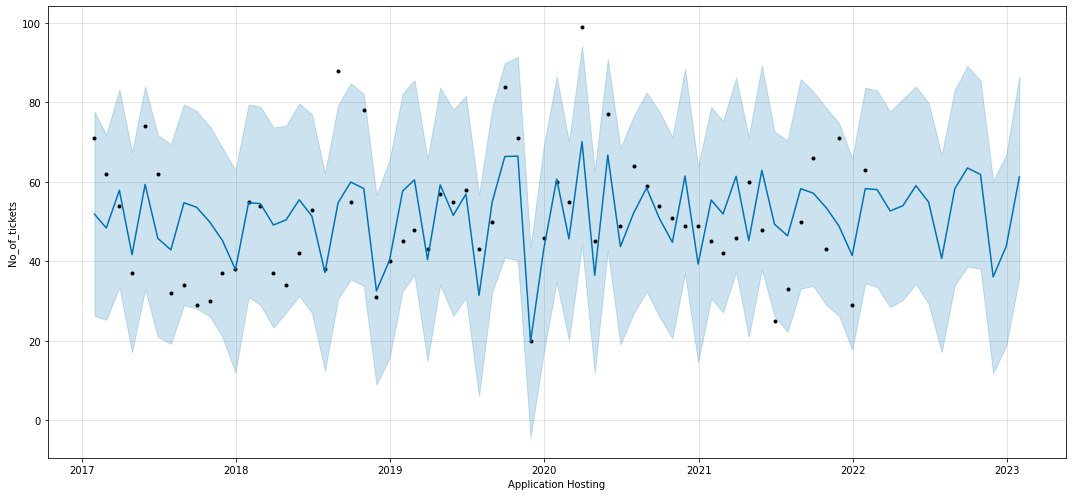

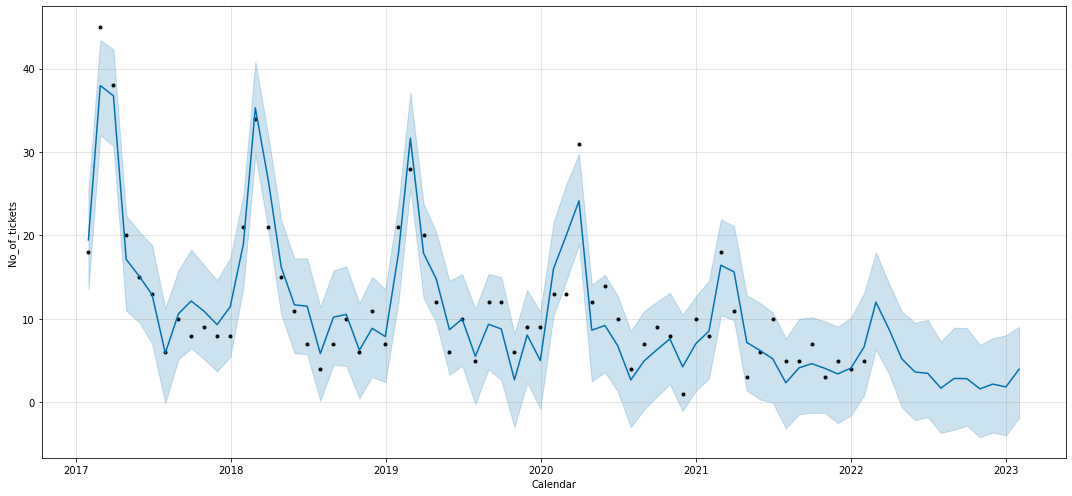

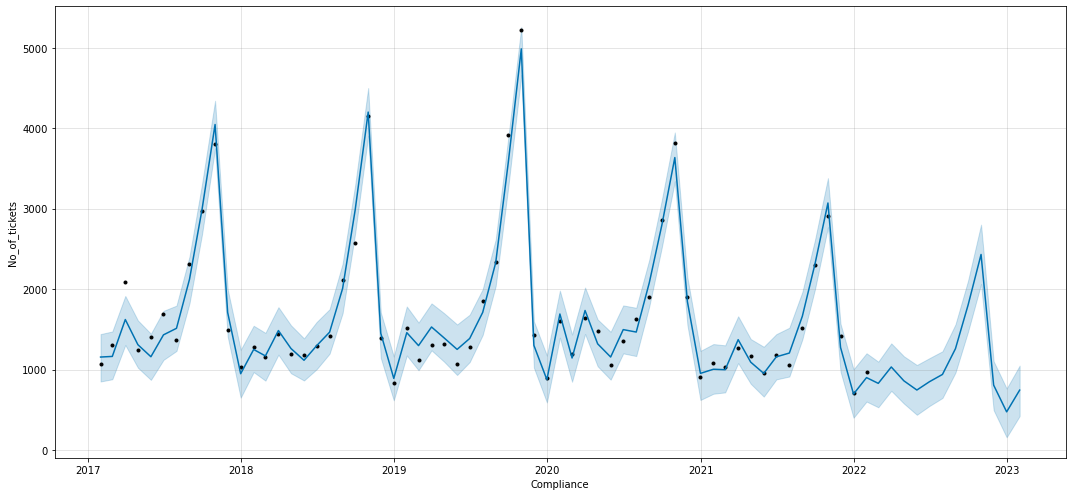

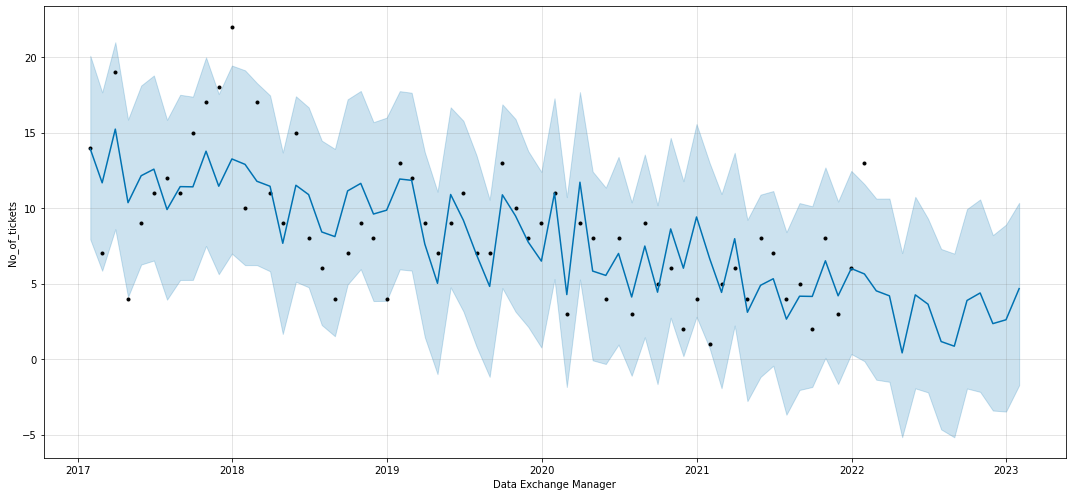

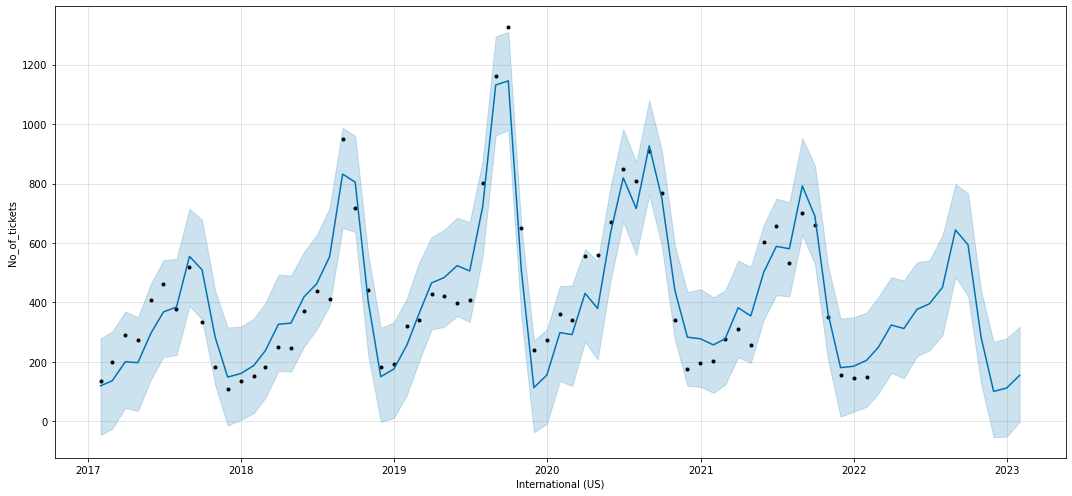

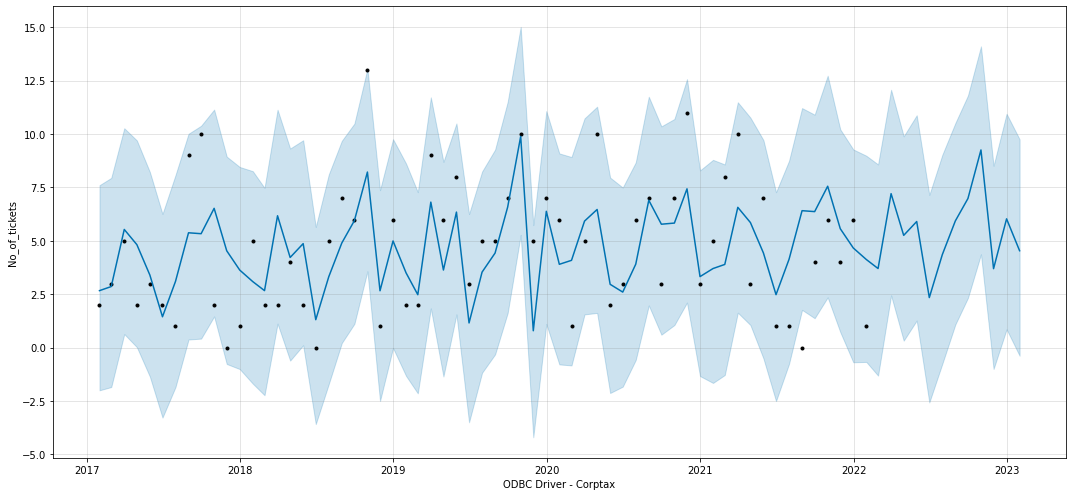

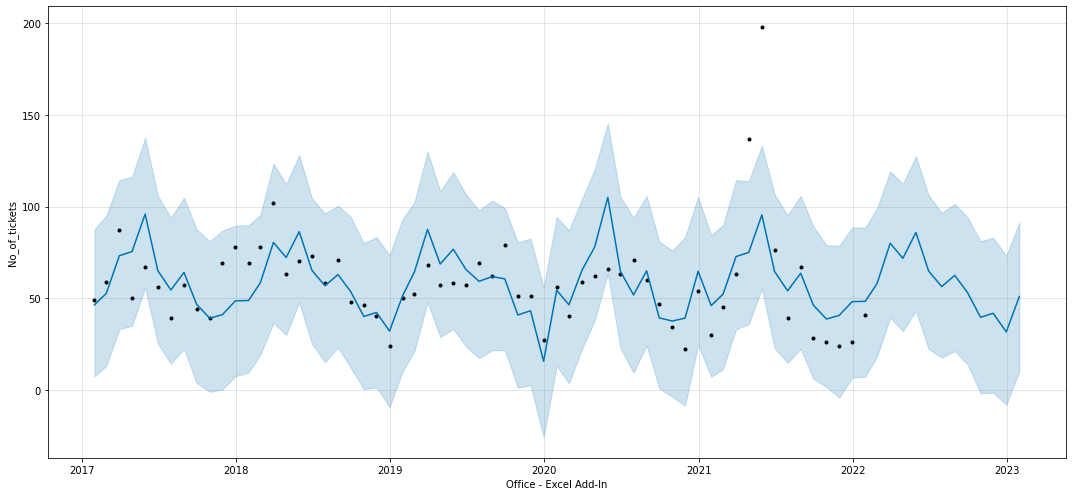

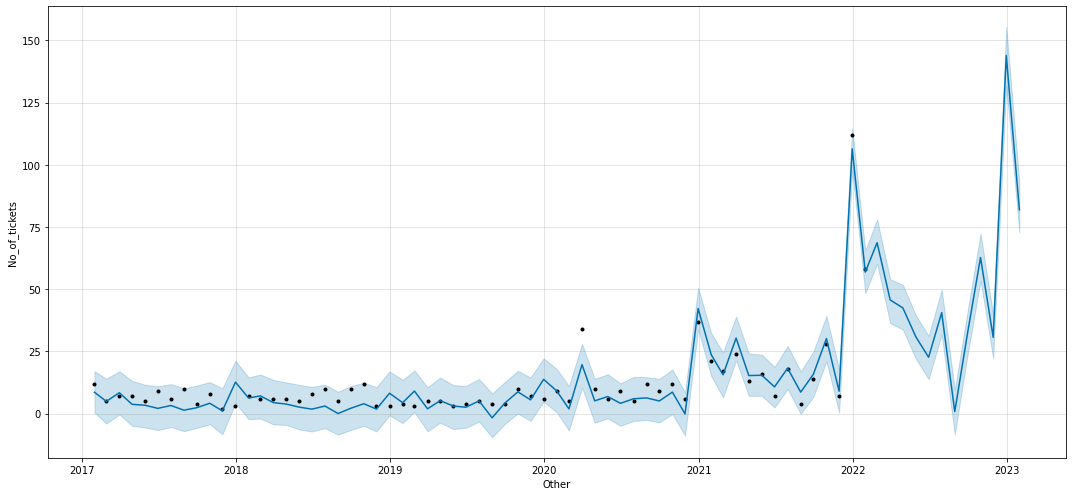

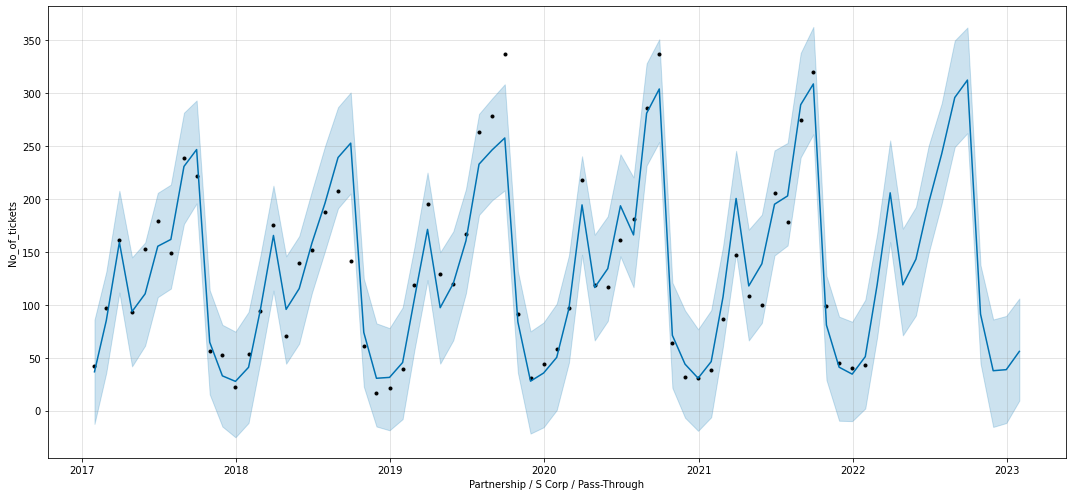

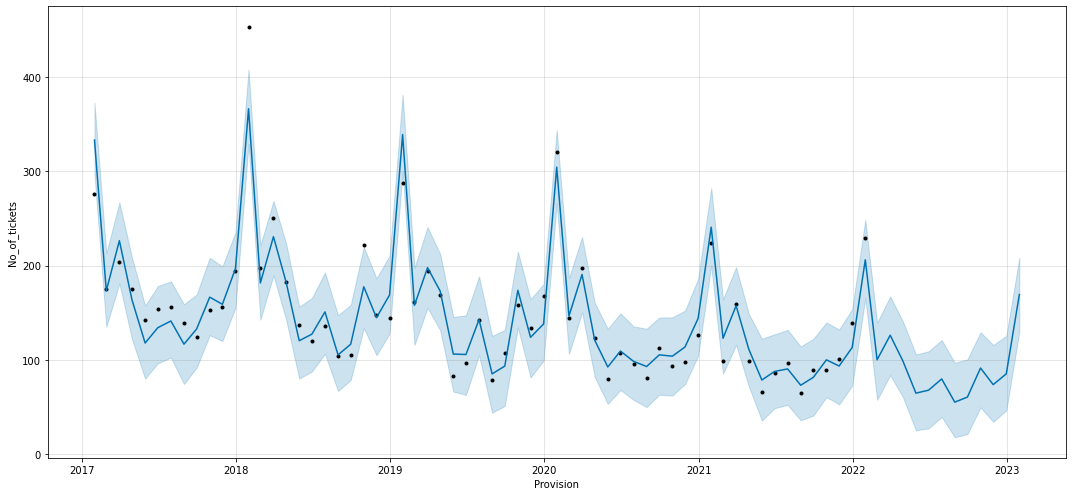

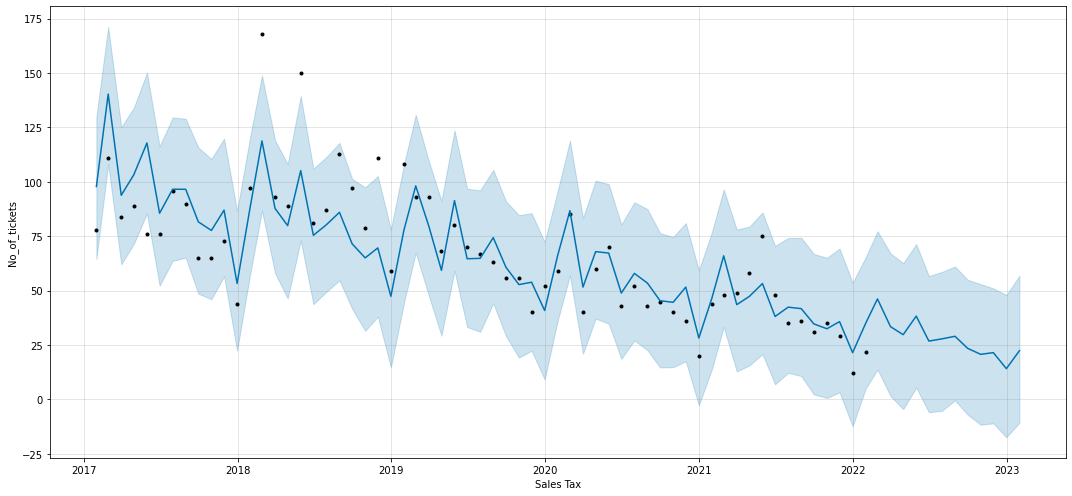

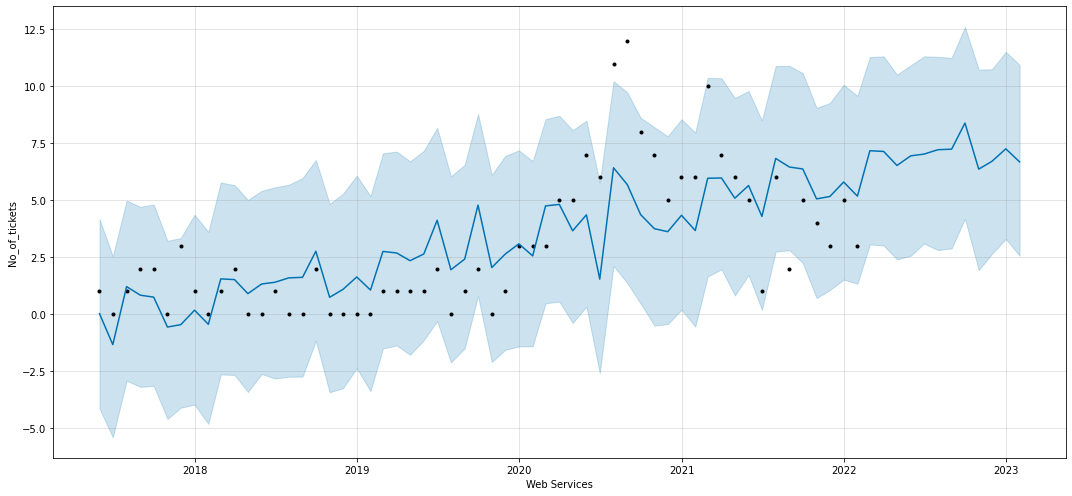

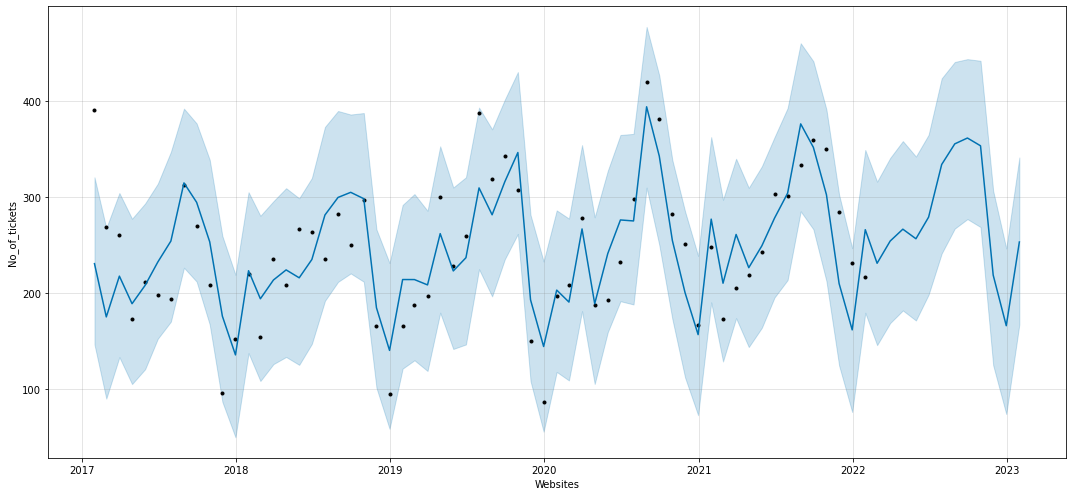

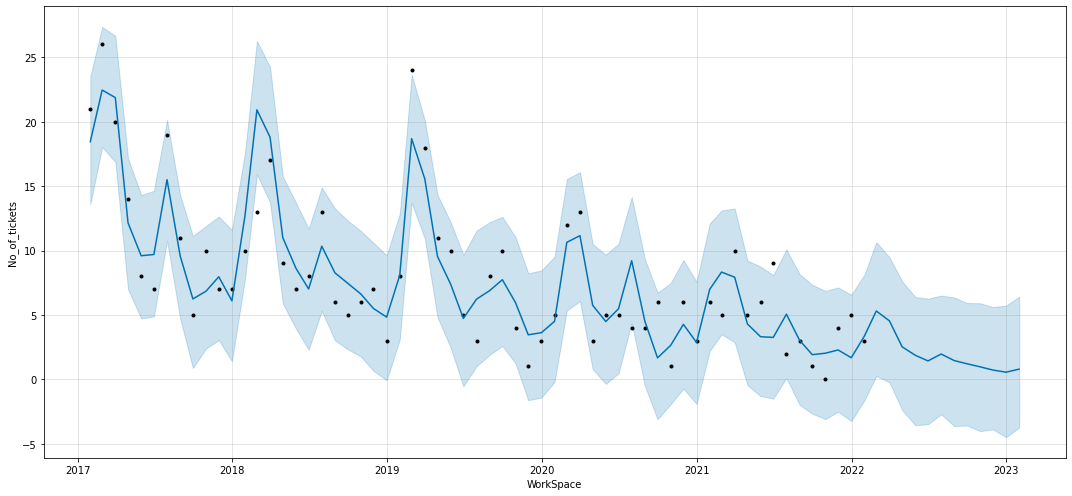

In [1704]:
target = pd.DataFrame()


for product in products.groups:
    group = products.get_group(product)
    train_group =  group[(group['ds']>= '2017-01-31')  & (group['ds']<= '2022-01-31')]
    test_group   = group[group['ds'] > '2022-01-31']
    value = adf_test(train_group['y'])
    #print(train_group.shape)

    # Check for Augmanted Dickyfuller test
    if value> 0.5:
        seasonality_value = 'multiplicative'
    else:
        seasonality_value = 'additive'

    model = Prophet(interval_width=0.95,seasonality_mode= seasonality_value)
    model.fit(train_group)
    future = model.make_future_dataframe(periods=12,freq='M')
    forecast = model.predict(future)
    model.plot(forecast,figsize=(15, 7),xlabel=product,ylabel='No_of_tickets')
  
    forecast = forecast.rename(columns={'yhat': 'yhat_'+product,'yhat_upper':'yhat_upper_'+product,'yhat_lower':'yhat_lower_'+product})
    target = pd.merge(target, forecast.set_index('ds'), how='outer', left_index=True, right_index=True)

        

    

In [1705]:
target

,trend_x,yhat_lower_Application Hosting,yhat_upper_Application Hosting,trend_lower_x,trend_upper_x,additive_terms_x,additive_terms_lower_x,additive_terms_upper_x,yearly_x,yearly_lower_x,...,multiplicative_terms_y,multiplicative_terms_lower_y,multiplicative_terms_upper_y,yearly_y,yearly_lower_y,yearly_upper_y,additive_terms_y,additive_terms_lower_y,additive_terms_upper_y,yhat_WorkSpace
ds,,,,,,,,,,,,,,,,,,,,,
2017-01-31,47.802645,26.277748,77.615153,47.802645,47.802645,4.096007,4.096007,4.096007,4.096007,4.096007,...,0.711877,0.711877,0.711877,0.711877,0.711877,0.711877,0.0,0.0,0.0,18.458024
2017-02-28,47.870452,25.297475,71.877258,47.870452,47.870452,0.519754,0.519754,0.519754,0.519754,0.519754,...,1.108265,1.108265,1.108265,1.108265,1.108265,1.108265,0.0,0.0,0.0,22.461009
2017-03-31,47.945524,33.529301,83.278126,47.945524,47.945524,9.931602,9.931602,9.931602,9.931602,9.931602,...,1.081245,1.081245,1.081245,1.081245,1.081245,1.081245,0.0,0.0,0.0,21.876952
2017-04-30,48.018175,17.143468,67.438199,48.018175,48.018175,-6.334659,-6.334659,-6.334659,-6.334659,-6.334659,...,0.171437,0.171437,0.171437,0.171437,0.171437,0.171437,0.0,0.0,0.0,12.152317
2017-05-31,48.093247,32.984001,84.025657,48.093247,48.093247,11.280733,11.280733,11.280733,11.280733,11.280733,...,-0.061863,-0.061863,-0.061863,-0.061863,-0.061863,-0.061863,0.0,0.0,0.0,9.598684
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-09-30,52.808495,38.715627,89.120115,52.808415,52.808577,10.688763,10.688763,10.688763,10.688763,10.688763,...,-0.066261,-0.066261,-0.066261,-0.066261,-0.066261,-0.066261,0.0,0.0,0.0,1.209611
2022-10-31,52.883494,38.143685,85.528470,52.883402,52.883589,8.977225,8.977225,8.977225,8.977225,8.977225,...,-0.155669,-0.155669,-0.155669,-0.155669,-0.155669,-0.155669,0.0,0.0,0.0,0.973716
2022-11-30,52.956074,11.858069,60.203718,52.955965,52.956182,-16.858009,-16.858009,-16.858009,-16.858009,-16.858009,...,-0.287238,-0.287238,-0.287238,-0.287238,-0.287238,-0.287238,0.0,0.0,0.0,0.723895


In [1706]:
target_yhat = target[['yhat_' + group for group in products.groups.keys()]]

In [1707]:
target_yhat_upper = target[['yhat_upper_' + group for group in products.groups.keys()]] #yhat_upper_'+product,'yhat_lower':'yhat_lower_'+product})
target_yhat_lower = target[['yhat_lower_' + group for group in products.groups.keys()]] #yhat_upper_'+product,'yhat_lower':'yhat_lower_'+product})

In [1720]:
Product_category

array(['Application Hosting', 'Calendar', 'Compliance',
       'Data Exchange Manager', 'International (US)',
       'ODBC Driver - Corptax', 'Office - Excel Add-In', 'Other',
       'Partnership / S Corp / Pass-Through', 'Provision', 'Sales Tax',
       'Web Services', 'Websites', 'WorkSpace'], dtype=object)

# Final Dataframe

In [1735]:
Application_Hosting_final = pd.concat([df_multi_timeseries.set_index('ds').query("Product=='Application Hosting'")['y'],target_yhat['yhat_Application Hosting']
                                                     ,target_yhat_upper['yhat_upper_Application Hosting'],target_yhat_lower['yhat_lower_Application Hosting']],axis=1)

Calendar_final = pd.concat([df_multi_timeseries.set_index('ds').query("Product=='Calendar'")['y'],target_yhat['yhat_Calendar']
                                                     ,target_yhat_upper['yhat_upper_Calendar'],target_yhat_lower['yhat_lower_Calendar']],axis=1)

compliance_final = pd.concat([df_multi_timeseries.set_index('ds').query("Product=='Compliance'")['y'],target_yhat['yhat_Compliance']
                                                     ,target_yhat_upper['yhat_upper_Compliance'],target_yhat_lower['yhat_lower_Compliance']],axis=1)

Data_Exchange_Manager_final = pd.concat([df_multi_timeseries.set_index('ds').query("Product=='Data Exchange Manager'")['y'],target_yhat['yhat_Data Exchange Manager']
                                                     ,target_yhat_upper['yhat_upper_Data Exchange Manager'],target_yhat_lower['yhat_lower_Data Exchange Manager']],axis=1)

International_US_final = pd.concat([df_multi_timeseries.set_index('ds').query("Product=='International (US)'")['y'],target_yhat['yhat_International (US)']
                                                    ,target_yhat_upper['yhat_upper_International (US)'],target_yhat_lower['yhat_lower_International (US)']],axis=1)

ODBC_Driver_Corptax_final = pd.concat([df_multi_timeseries.set_index('ds').query("Product=='ODBC Driver - Corptax'")['y'],target_yhat['yhat_ODBC Driver - Corptax']
                                                     ,target_yhat_upper['yhat_upper_ODBC Driver - Corptax'],target_yhat_lower['yhat_lower_ODBC Driver - Corptax']],axis=1)

Office_Excel_Add_In_final = pd.concat([df_multi_timeseries.set_index('ds').query("Product=='Office - Excel Add-In'")['y'],target_yhat['yhat_Office - Excel Add-In']
                                                   ,target_yhat_upper['yhat_upper_Office - Excel Add-In'],target_yhat_lower['yhat_lower_Office - Excel Add-In']],axis=1)

Other_final = pd.concat([df_multi_timeseries.set_index('ds').query("Product=='Other'")['y'],target_yhat['yhat_Other']
                                                     ,target_yhat_upper['yhat_upper_Other'],target_yhat_lower['yhat_lower_Other']],axis=1)

Partnership_S_Corp_Pass_Through_final = pd.concat([df_multi_timeseries.set_index('ds').query("Product=='Partnership / S Corp / Pass-Through'")['y'],target_yhat['yhat_Partnership / S Corp / Pass-Through']
                                                     ,target_yhat_upper['yhat_upper_Partnership / S Corp / Pass-Through'],target_yhat_lower['yhat_lower_Partnership / S Corp / Pass-Through']],axis=1)

Provision_final = pd.concat([df_multi_timeseries.set_index('ds').query("Product=='Provision'")['y'],target_yhat['yhat_Provision']
                                                    ,target_yhat_upper['yhat_upper_Provision'],target_yhat_lower['yhat_lower_Provision']],axis=1)

Sales_Tax_final = pd.concat([df_multi_timeseries.set_index('ds').query("Product=='Sales Tax'")['y'],target_yhat['yhat_Sales Tax']
                                                     ,target_yhat_upper['yhat_upper_Sales Tax'],target_yhat_lower['yhat_lower_Sales Tax']],axis=1)

Web_Services_final = pd.concat([df_multi_timeseries.set_index('ds').query("Product=='Web Services'")['y'],target_yhat['yhat_Web Services']
                                                    ,target_yhat_upper['yhat_upper_Web Services'],target_yhat_lower['yhat_lower_Web Services']],axis=1)

Websites_final = pd.concat([df_multi_timeseries.set_index('ds').query("Product=='Websites'")['y'],target_yhat['yhat_Websites']
                                                     ,target_yhat_upper['yhat_upper_Websites'],target_yhat_lower['yhat_lower_Websites']],axis=1)

WorkSpace_final = pd.concat([df_multi_timeseries.set_index('ds').query("Product=='WorkSpace'")['y'],target_yhat['yhat_WorkSpace']
                                                    ,target_yhat_upper['yhat_upper_WorkSpace'],target_yhat_lower['yhat_lower_WorkSpace']],axis=1)



In [1806]:
Web_Services_final.head(10)

,y,yhat_Web Services,yhat_upper_Web Services,yhat_lower_Web Services
ds,,,,
2017-01-31,NaN,NaN,NaN,NaN
2017-02-28,NaN,NaN,NaN,NaN
2017-03-31,NaN,NaN,NaN,NaN
2017-04-30,NaN,NaN,NaN,NaN
2017-05-31,1.0,0.018791,4.172119,-4.146725
2017-06-30,0.0,-1.338929,2.541273,-5.407154
2017-07-31,1.0,1.206795,4.983431,-2.921203
2017-08-31,2.0,0.829370,4.710468,-3.194028
2017-09-30,2.0,0.744800,4.808991,-3.152645


In [1811]:
Web_Services_final.head(50)

,y,yhat_Web Services,yhat_upper_Web Services,yhat_lower_Web Services
ds,,,,
2017-01-31,NaN,NaN,NaN,NaN
2017-02-28,NaN,NaN,NaN,NaN
2017-03-31,NaN,NaN,NaN,NaN
2017-04-30,NaN,NaN,NaN,NaN
2017-05-31,1.0,0.018791,4.172119,-4.146725
2017-06-30,0.0,-1.338929,2.541273,-5.407154
2017-07-31,1.0,1.206795,4.983431,-2.921203
2017-08-31,2.0,0.829370,4.710468,-3.194028
2017-09-30,2.0,0.744800,4.808991,-3.152645


In [1808]:
df_compliance.head()

,Product,no_of_tickets
Date,,
2017-01-31,Compliance,1066
2017-02-28,Compliance,1300
2017-03-31,Compliance,2092
2017-04-30,Compliance,1247
2017-05-31,Compliance,1407
